## Packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
# Parameters to improve default styles of matplotlib and seaborn    
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Dataset

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Shape
df.shape

(1338, 7)

In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# description
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis and Visualization

### Age

In [8]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [9]:
fig = px.histogram(df, x='age', nbins=47, title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

- Age is a numeric column. 

- The minimum age in the dataset is 18 and the maximum age is 64. 

- Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. 

### Body Mass Index (BMI)


In [10]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [11]:
fig = px.histogram(df, x='bmi', nbins=47, title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) centered around the value 30, with a few outliers towards the right. 

### Charges

In [12]:
fig = px.histogram(df, x='charges', nbins=47, title='Distribution of Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
fig = px.histogram(df, x='charges', marginal='box', color='smoker', color_discrete_sequence=['green', 'grey'], title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

- For most customers, the annual medical charges are under \\$10,000. 

- Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases.

- The distribution follows a **"power law"**

- There is a significant difference in medical expenses between smokers and non-smokers. 

- While the median for non-smokers is \\$7300, the median for smokers is close to \\$35,000.

### Sex

In [14]:
fig = px.histogram(df, x = 'sex', title='Gender distribution')
fig.update_layout(bargap=0.1)
fig.show()

### Region

In [15]:
fig = px.histogram(df, x = 'region', title='Gender distribution', color='sex')
fig.update_layout(bargap=0.1)
fig.show()

### Smoker

In [16]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [17]:
px.histogram(df, x='smoker', title='Smoker Distribution', color='sex')

### Children

In [18]:
df.children.value_counts()


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [19]:
fig = px.histogram(df, x='children', marginal='box', title='Children Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [20]:
px.histogram(df, x='region', title='Children Distribution Across Regions', color='children')

## Relationship

### Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. 

Each point in the scatter plot represents one customer.

In [21]:
fig = px.scatter(df, x='age', y='charges', color='smoker', opacity=0.8, hover_data=['sex'], title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

- The general trend seems to be that medical charges increase with age, as we might expect. 

    - However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


- We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

    1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
    
    2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
    
    3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking. 

### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. 

In [22]:
fig = px.scatter(df, x='bmi', y='charges', color='smoker', opacity=0.8, hover_data=['sex'], title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

### Children Vs Charges

In [23]:
px.violin(df, x='children', y='charges')

### Smoker Vs Charges

In [24]:
px.violin(df, x='smoker', y='charges')

### Sex Vs Charges

In [25]:
px.violin(df, x='sex', y='charges')

### Region Vs Charges

In [26]:
px.violin(df, x='region', y='charges')

## Correlation

- As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. 

    - E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

In [27]:
df.charges.corr(df.age)

0.2990081933306476

In [28]:
df.charges.corr(df.bmi)

0.19834096883362895

In [29]:
df.charges.corr(df.children)

0.06799822684790478

In [30]:
df.smoker = df.smoker.map({'yes': 1, 'no': 0})
df.charges.corr(df.smoker)

0.787251430498478

In [31]:
df.sex = df.sex.map({'male': 1, 'female': 0})
df.charges.corr(df.sex)

0.057292062202025484

In [32]:
df.region = df.region.map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})
df.charges.corr(df.region)

0.006208234909444513

In [33]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

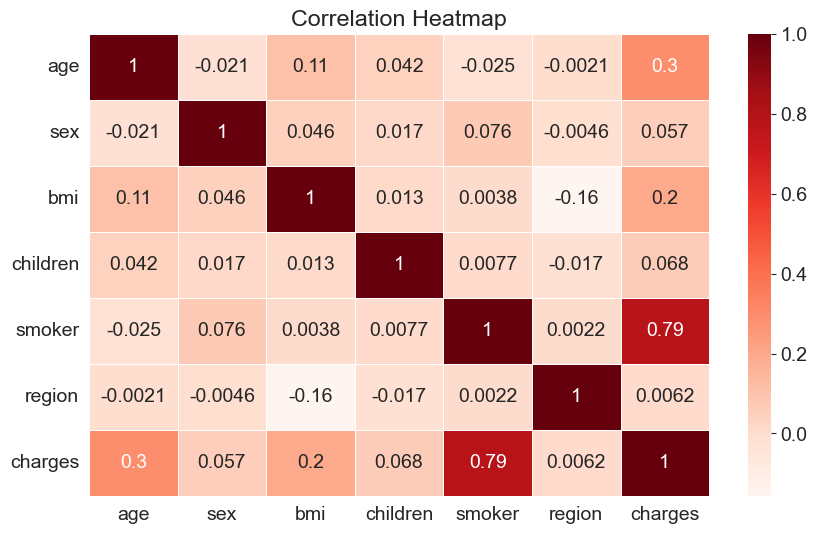

In [34]:
# Confusion matrix
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.5)
plt.title('Correlation Heatmap')